In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cmocean as cm
from xgcm import Grid


In [2]:
ave = False ## True means use 5 daily average rather than hourly prog
def open_files(folder):
    base = folder
    if ave:
        prog = xr.open_dataset(base + '/ave_prog.nc')
    else:
        prog = xr.open_dataset(base + '/prog.nc')
    ocean_static = xr.open_dataset(base + "/ocean_geometry.nc")
    return prog, ocean_static
def open_IC(folder):
    base = folder
    IC = xr.open_dataset(base + '/MOM_IC.nc')
    return IC


In [3]:
def plot(ax,yy0,tt,i,variable,varname,vmin1,vmax1,cmap,ymax):
    prog, ocean_static = open_files(folder)
    grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"},
                             "z":{"center":"zl","outer":"zi"}},periodic=False)
    file_name = folder
    label = folder
    depth = grid.interp(prog.e,'x')
    lon = ocean_static.geolonb
    dataplot = variable

    xx = lon
    if varname == "uo": dataplot = dataplot[:,:,:,:-1]
    levels = np.linspace(vmin1, vmax1, 51)
    yy = depth[:,:,yy0,:]
    z_levels = yy.shape[1]
    yi = np.linspace(0,5000,z_levels) #Dummy, just for have z_levels
    # plot variable in colours
    xi, yyi = np.meshgrid(xx[yy0,:], yi) #We repeat the horizontal part of the grid by the number of zlevels
    #cax = ax.contourf(xi,yy[tt,...],dataplot[tt,:,yy0,:],levels = levels, cmap = cmap, extend = 'both',corner_mask = False)
    #print(xi.shape)
    #print(yy[tt,...].shape)
    #print(dataplot[tt,:,yy0,:].shape)
    cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
    
    plt.colorbar(cax, ax = ax, label = varname)
    
    ## plot interface heights
    i_heights = prog.e # this is 'Interface Height Relative to Mean Sea Level'
    # do for one time
    i_heights = i_heights.isel(Time = tt)
    # take zonal mean
    i_heights = i_heights.isel(yh = yy0)#.mean('xh')

    # plot a line of layer depths, layer by layer
    nz = len(i_heights.zi)
    xh = prog.xh

    for i in range(nz):
        ax.plot(xh,i_heights[i], color = 'k', linewidth = 0.5)
    
    ax.set_ylim(ymin=-ymax,ymax=0)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('x (km)')
    ax.set_title(varname+' , ' +label)


time = 0001-01-01 01:00:00


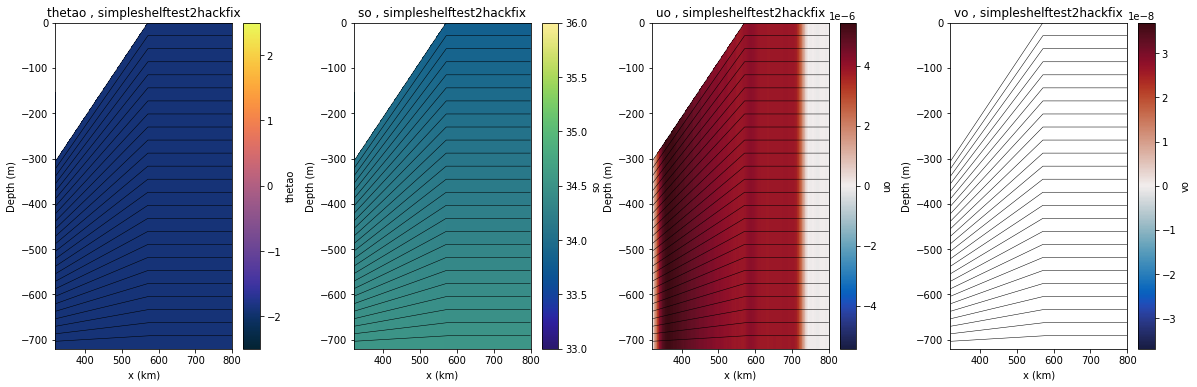

In [5]:
label = 'simpleshelftest2hackfix'
folder = label
prog, ocean_static = open_files(label)
IC = open_IC(label)
fig,axes = plt.subplots(figsize = (20,6), nrows = 1, ncols = 4)
time = 0 ## 5 days
x = 0
ymax = 720
#plot temp
plot(axes[0],x,time,0,prog.temp,"thetao",-2.5,2.5,cm.cm.thermal,ymax)
# plot salinity
plot(axes[1],x,time,0,prog.salt,"so",33,36,cm.cm.haline,ymax)
# plot u
scale = np.abs(prog.isel(Time = time).u).max().values
if scale < 1e-12: ## in case of very small number
    scale = 1e-12
scale = scale#/10
plot(axes[2],x,time,0,prog.u,"uo",-scale,scale,cm.cm.balance,ymax)
# plot v
scale = np.abs(prog.isel(Time = time).v).max().values
if scale < 1e-12: ## in case of very small number
    scale = 1e-12
scale = scale#/10
plot(axes[3],x,time,0,prog.v,"vo",-scale,scale,cm.cm.balance,ymax)

plt.subplots_adjust(wspace = 0.35, hspace = 0.3)

print('time = '+str(prog.isel(Time = time).Time.values))

time = 0001-01-01 01:00:00


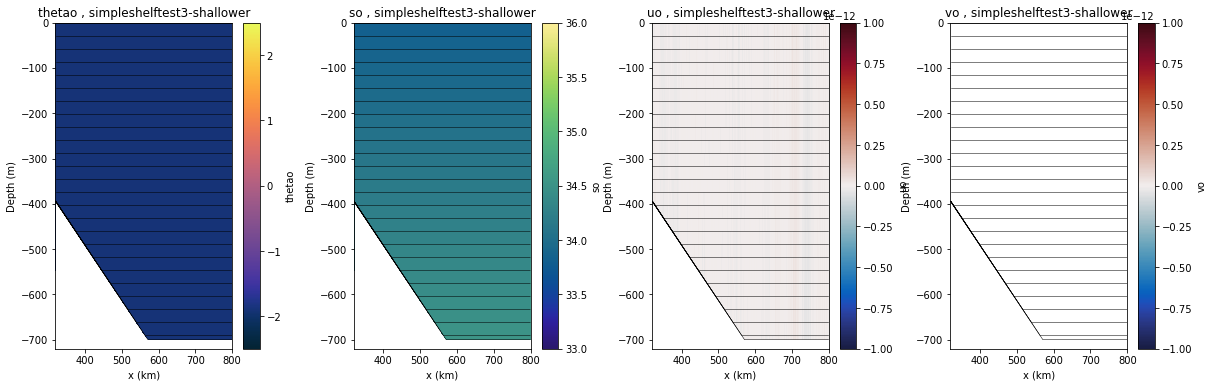

In [6]:
label = 'simpleshelftest3-shallower'
prog, ocean_static = open_files(label)
folder = label
IC = open_IC(label)
fig,axes = plt.subplots(figsize = (20,6), nrows = 1, ncols = 4)
time = 0 ## 5 days
x = 0
ymax = 720
#plot temp
plot(axes[0],x,time,0,prog.temp,"thetao",-2.5,2.5,cm.cm.thermal,ymax)
# plot salinity
plot(axes[1],x,time,0,prog.salt,"so",33,36,cm.cm.haline,ymax)
# plot u
scale = np.abs(prog.isel(Time = time).u).max().values
if scale < 1e-12: ## in case of very small number
    scale = 1e-12
scale = scale#/10
plot(axes[2],x,time,0,prog.u,"uo",-scale,scale,cm.cm.balance,ymax)
# plot v
scale = np.abs(prog.isel(Time = time).v).max().values
if scale < 1e-12: ## in case of very small number
    scale = 1e-12
scale = scale#/10
plot(axes[3],x,time,0,prog.v,"vo",-scale,scale,cm.cm.balance,ymax)

plt.subplots_adjust(wspace = 0.35, hspace = 0.3)

print('time = '+str(prog.isel(Time = time).Time.values))

In [7]:

def open_mom(folder):
    base = folder
    IC = xr.open_dataset(base + '/mom.nc')
    return IC


Text(0.5, 0.98, 'Time = 1 hour, Bottom Layer simpleshelftest3-shallower')

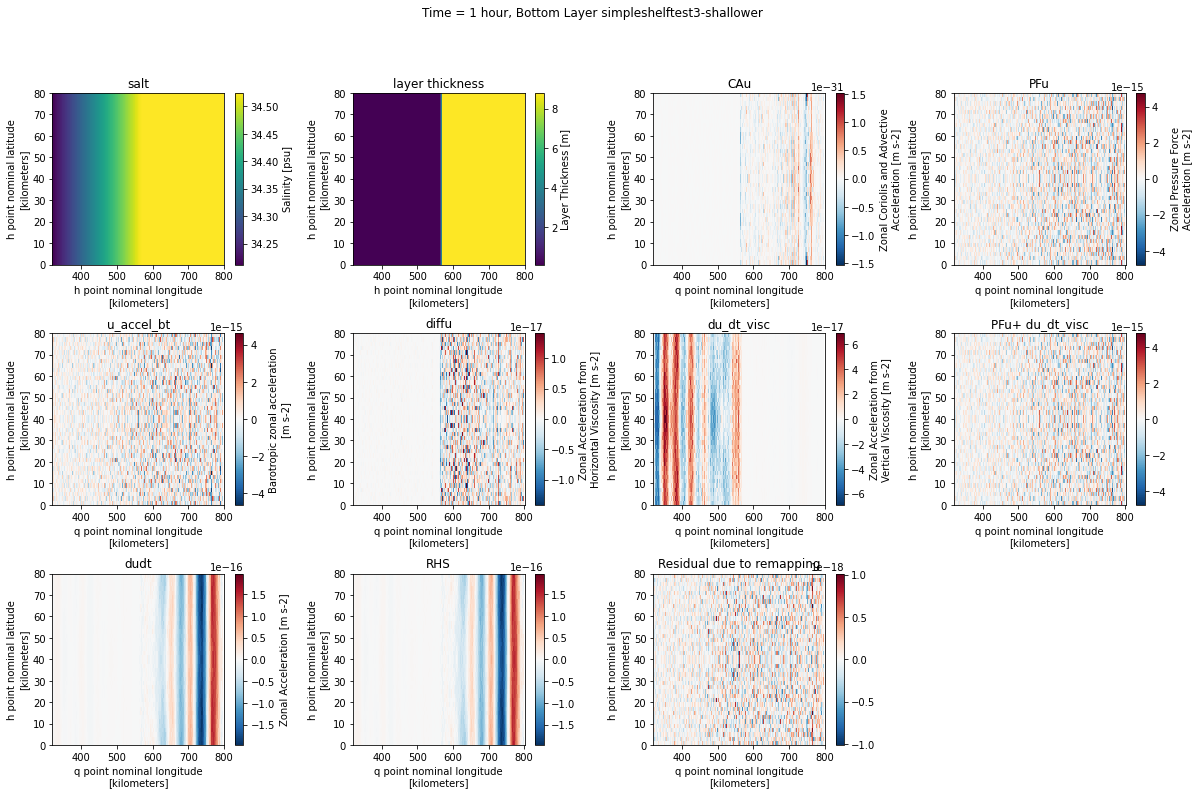

In [10]:
label = 'simpleshelftest3-shallower'
mom = open_mom(label)
tt = 0
zz = -1
fig,axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20,12))
prog.salt.isel(Time = tt, zl = zz).plot(ax = axes[0,0])
axes[0,0].set_title('salt')

prog.h.isel(Time = tt, zl = zz).plot(ax = axes[0,1])
axes[0,1].set_title('layer thickness')

mom.CAu.isel(Time = tt, zl = zz).plot(ax = axes[0,2])
axes[0,2].set_title('CAu')

mom.PFu.isel(Time = tt, zl = zz).plot(ax = axes[0,3])
axes[0,3].set_title('PFu')

mom.u_accel_bt.isel(Time = tt).plot(ax = axes[1,0])## no z dependence
axes[1,0].set_title('u_accel_bt')

mom.diffu.isel(Time = tt, zl = zz).plot(ax = axes[1,1]) 
axes[1,1].set_title('diffu')

mom.du_dt_visc.isel(Time = tt, zl = zz).plot(ax = axes[1,2])
axes[1,2].set_title('du_dt_visc')

(mom.PFu+mom.du_dt_visc).isel(Time = tt, zl = zz).plot(ax = axes[1,3])
axes[1,3].set_title('PFu+ du_dt_visc')


mom.dudt.isel(Time = tt, zl = zz).plot(ax = axes[2,0])
axes[2,0].set_title('dudt')

RHS = mom.CAu.isel(Time = tt, zl = zz) + mom.PFu.isel(Time = tt, zl = zz) +\
      mom.u_accel_bt.isel(Time = tt) + mom.diffu.isel(Time = tt, zl = zz) + \
      mom.du_dt_visc.isel(Time = tt, zl = zz)
RHS.plot(ax = axes[2,1])
axes[2,1].set_title('RHS')

(RHS-mom.dudt.isel(Time = tt, zl = zz)).plot(ax = axes[2,2])
axes[2,2].set_title('Residual due to remapping')

axes[2,3].axis('off')


fig.subplots_adjust(wspace = 0.4, hspace = 0.4)
fig.suptitle('Time = 1 hour, Bottom Layer '+label)

Text(0.5, 0.98, 'Time = 1 hour, Top Layer simpleshelftest2hackfix')

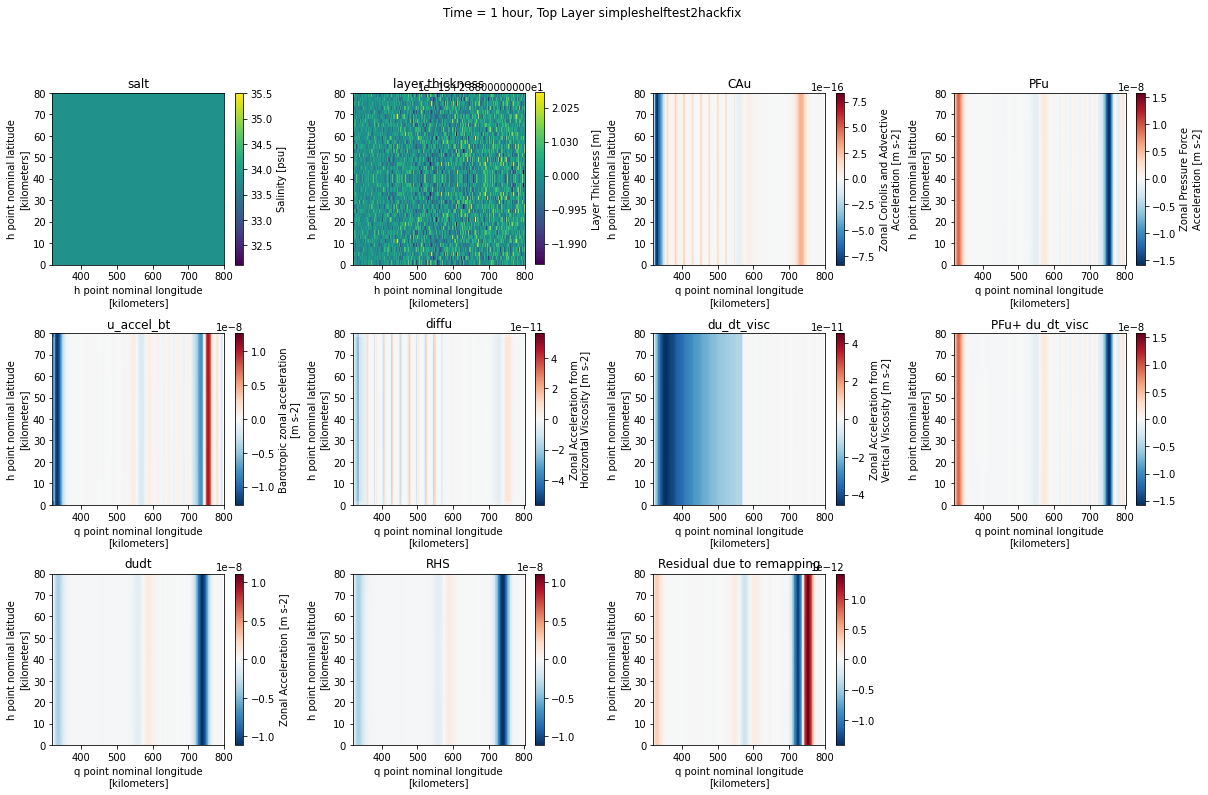

In [11]:
label = 'simpleshelftest2hackfix'
mom = open_mom(label)
tt = 0
zz = 0
fig,axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20,12))
prog.salt.isel(Time = tt, zl = zz).plot(ax = axes[0,0])
axes[0,0].set_title('salt')

prog.h.isel(Time = tt, zl = zz).plot(ax = axes[0,1])
axes[0,1].set_title('layer thickness')

mom.CAu.isel(Time = tt, zl = zz).plot(ax = axes[0,2])
axes[0,2].set_title('CAu')

mom.PFu.isel(Time = tt, zl = zz).plot(ax = axes[0,3])
axes[0,3].set_title('PFu')

mom.u_accel_bt.isel(Time = tt).plot(ax = axes[1,0])## no z dependence
axes[1,0].set_title('u_accel_bt')

mom.diffu.isel(Time = tt, zl = zz).plot(ax = axes[1,1]) 
axes[1,1].set_title('diffu')

mom.du_dt_visc.isel(Time = tt, zl = zz).plot(ax = axes[1,2])
axes[1,2].set_title('du_dt_visc')

(mom.PFu+mom.du_dt_visc).isel(Time = tt, zl = zz).plot(ax = axes[1,3])
axes[1,3].set_title('PFu+ du_dt_visc')


mom.dudt.isel(Time = tt, zl = zz).plot(ax = axes[2,0])
axes[2,0].set_title('dudt')

RHS = mom.CAu.isel(Time = tt, zl = zz) + mom.PFu.isel(Time = tt, zl = zz) +\
      mom.u_accel_bt.isel(Time = tt) + mom.diffu.isel(Time = tt, zl = zz) + \
      mom.du_dt_visc.isel(Time = tt, zl = zz)
RHS.plot(ax = axes[2,1])
axes[2,1].set_title('RHS')

(RHS-mom.dudt.isel(Time = tt, zl = zz)).plot(ax = axes[2,2])
axes[2,2].set_title('Residual due to remapping')

axes[2,3].axis('off')


fig.subplots_adjust(wspace = 0.4, hspace = 0.4)
fig.suptitle('Time = 1 hour, Top Layer ' + label)

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_20734/475457207.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)


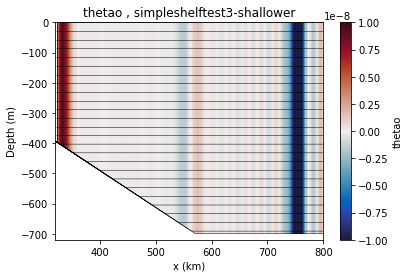

In [16]:
label = 'simpleshelftest2hackfix'
mom = open_mom(label)
fig,axes = plt.subplots()
time = 0 ## 5 days
x = 0
ymax = 720
#plot temp
plot(axes,x,time,0,mom.PFu,"thetao",-1e-8,1e-8,cm.cm.balance,ymax)


/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_20734/475457207.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)


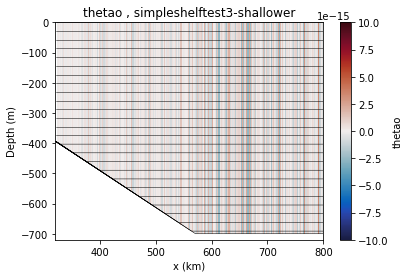

In [21]:
label = 'simpleshelftest3-shallower'
mom = open_mom(label)
fig,axes = plt.subplots()
time = 0 ## 5 days
x = 0
ymax = 720
#plot temp
plot(axes,x,time,0,mom.PFu,"thetao",-1e-14,1e-14,cm.cm.balance,ymax)


# Repeat for very first timestep

   Change `diag_table` and run again due to memory and set `DAYMAX = 0.05`

time = 0001-01-01 00:05:00


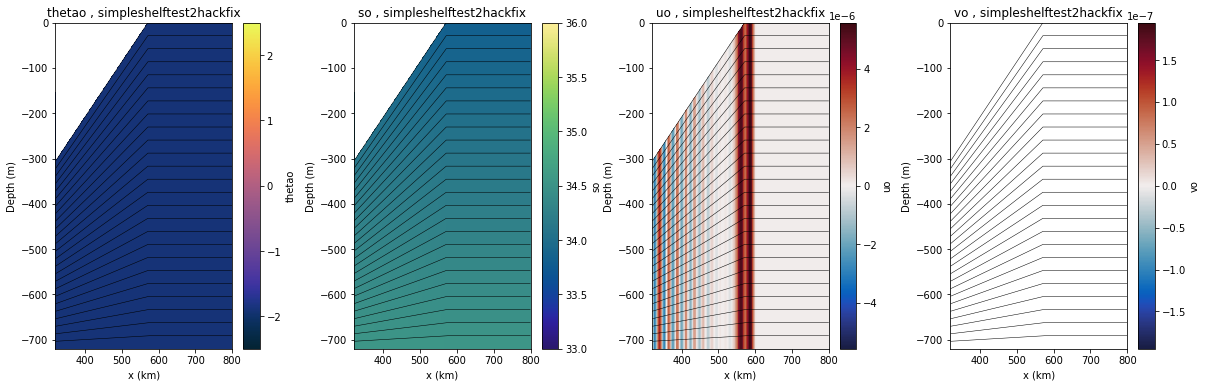

In [22]:
label = 'simpleshelftest2hackfix'
folder = label
prog, ocean_static = open_files(label)
IC = open_IC(label)
fig,axes = plt.subplots(figsize = (20,6), nrows = 1, ncols = 4)
time = 0 ## 5 days
x = 0
ymax = 720
#plot temp
plot(axes[0],x,time,0,prog.temp,"thetao",-2.5,2.5,cm.cm.thermal,ymax)
# plot salinity
plot(axes[1],x,time,0,prog.salt,"so",33,36,cm.cm.haline,ymax)
# plot u
scale = np.abs(prog.isel(Time = time).u).max().values
if scale < 1e-12: ## in case of very small number
    scale = 1e-12
scale = scale#/10
plot(axes[2],x,time,0,prog.u,"uo",-scale,scale,cm.cm.balance,ymax)
# plot v
scale = np.abs(prog.isel(Time = time).v).max().values
if scale < 1e-12: ## in case of very small number
    scale = 1e-12
scale = scale#/10
plot(axes[3],x,time,0,prog.v,"vo",-scale,scale,cm.cm.balance,ymax)

plt.subplots_adjust(wspace = 0.35, hspace = 0.3)

print('time = '+str(prog.isel(Time = time).Time.values))

time = 0001-01-01 00:05:00


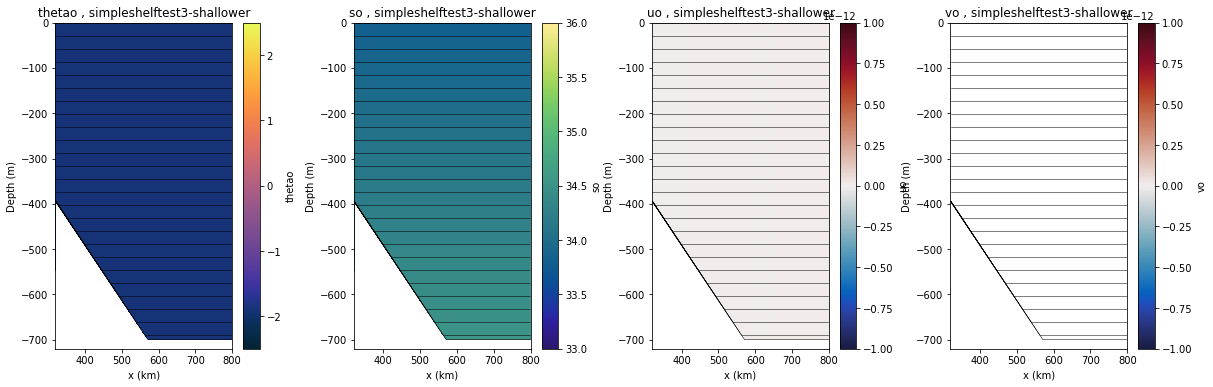

In [23]:
label = 'simpleshelftest3-shallower'
prog, ocean_static = open_files(label)
folder = label
IC = open_IC(label)
fig,axes = plt.subplots(figsize = (20,6), nrows = 1, ncols = 4)
time = 0 ## 5 days
x = 0
ymax = 720
#plot temp
plot(axes[0],x,time,0,prog.temp,"thetao",-2.5,2.5,cm.cm.thermal,ymax)
# plot salinity
plot(axes[1],x,time,0,prog.salt,"so",33,36,cm.cm.haline,ymax)
# plot u
scale = np.abs(prog.isel(Time = time).u).max().values
if scale < 1e-12: ## in case of very small number
    scale = 1e-12
scale = scale#/10
plot(axes[2],x,time,0,prog.u,"uo",-scale,scale,cm.cm.balance,ymax)
# plot v
scale = np.abs(prog.isel(Time = time).v).max().values
if scale < 1e-12: ## in case of very small number
    scale = 1e-12
scale = scale#/10
plot(axes[3],x,time,0,prog.v,"vo",-scale,scale,cm.cm.balance,ymax)

plt.subplots_adjust(wspace = 0.35, hspace = 0.3)

print('time = '+str(prog.isel(Time = time).Time.values))

Text(0.5, 0.98, 'Time = 300s, Bottom Layer simpleshelftest3-shallower')

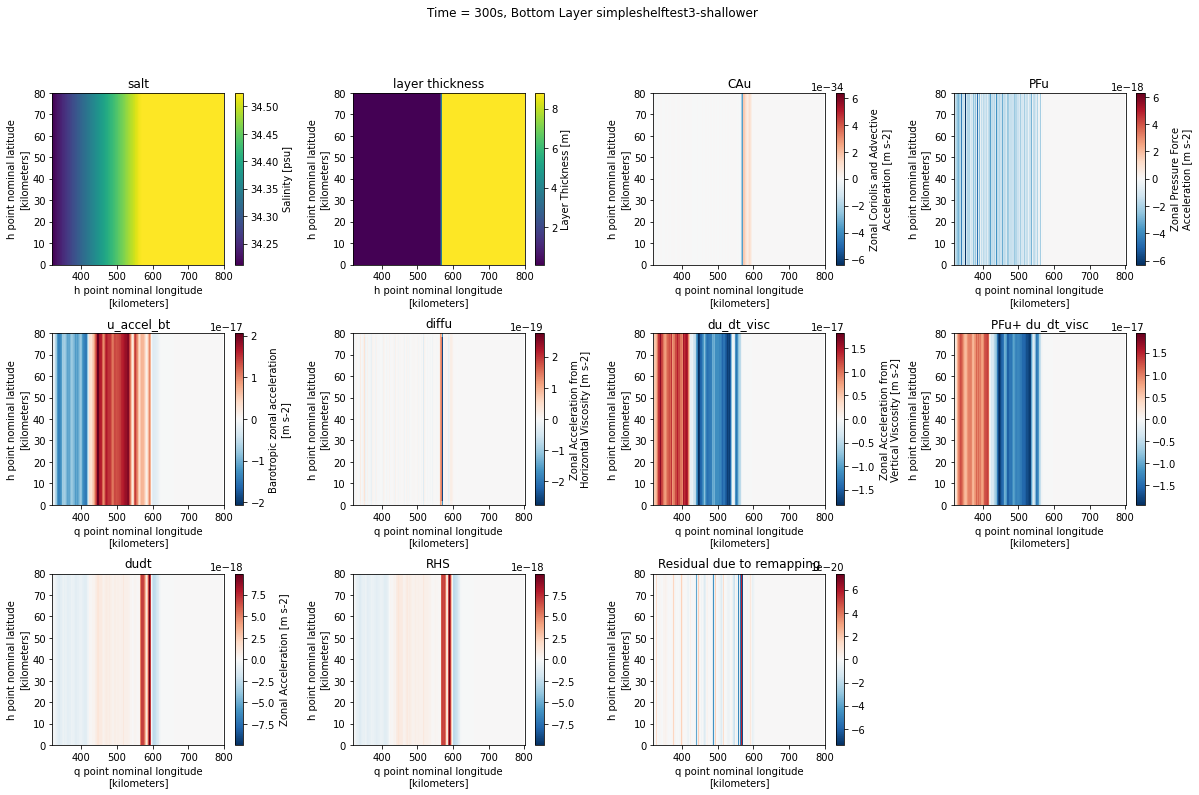

In [32]:
label = 'simpleshelftest3-shallower'
mom = open_mom(label)
prog, ocean_static = open_files(label)

tt = 0
zz = -1
fig,axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20,12))
prog.salt.isel(Time = tt, zl = zz).plot(ax = axes[0,0])
axes[0,0].set_title('salt')

prog.h.isel(Time = tt, zl = zz).plot(ax = axes[0,1])
axes[0,1].set_title('layer thickness')

mom.CAu.isel(Time = tt, zl = zz).plot(ax = axes[0,2])
axes[0,2].set_title('CAu')

mom.PFu.isel(Time = tt, zl = zz).plot(ax = axes[0,3])
axes[0,3].set_title('PFu')

mom.u_accel_bt.isel(Time = tt).plot(ax = axes[1,0])## no z dependence
axes[1,0].set_title('u_accel_bt')

mom.diffu.isel(Time = tt, zl = zz).plot(ax = axes[1,1]) 
axes[1,1].set_title('diffu')

mom.du_dt_visc.isel(Time = tt, zl = zz).plot(ax = axes[1,2])
axes[1,2].set_title('du_dt_visc')

(mom.PFu+mom.du_dt_visc).isel(Time = tt, zl = zz).plot(ax = axes[1,3])
axes[1,3].set_title('PFu+ du_dt_visc')


mom.dudt.isel(Time = tt, zl = zz).plot(ax = axes[2,0])
axes[2,0].set_title('dudt')

RHS = mom.CAu.isel(Time = tt, zl = zz) + mom.PFu.isel(Time = tt, zl = zz) +\
      mom.u_accel_bt.isel(Time = tt) + mom.diffu.isel(Time = tt, zl = zz) + \
      mom.du_dt_visc.isel(Time = tt, zl = zz)
RHS.plot(ax = axes[2,1])
axes[2,1].set_title('RHS')

(RHS-mom.dudt.isel(Time = tt, zl = zz)).plot(ax = axes[2,2])
axes[2,2].set_title('Residual due to remapping')

axes[2,3].axis('off')


fig.subplots_adjust(wspace = 0.4, hspace = 0.4)
fig.suptitle('Time = 300s, Bottom Layer '+label)

Text(0.5, 0.98, 'Time = 300s, Top Layer simpleshelftest2hackfix')

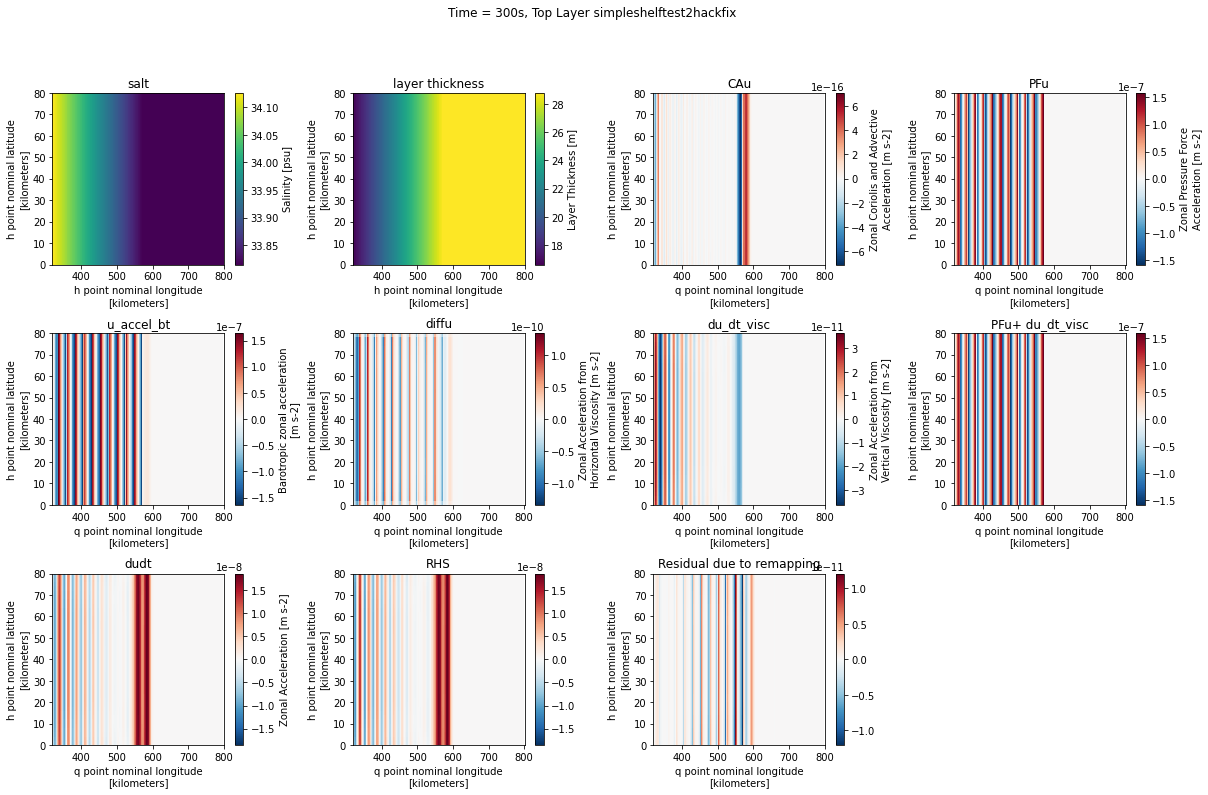

In [33]:
label = 'simpleshelftest2hackfix'
mom = open_mom(label)
prog, ocean_static = open_files(label)
tt = 0
zz = 0
fig,axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20,12))
prog.salt.isel(Time = tt, zl = zz).plot(ax = axes[0,0])
axes[0,0].set_title('salt')

prog.h.isel(Time = tt, zl = zz).plot(ax = axes[0,1])
axes[0,1].set_title('layer thickness')

mom.CAu.isel(Time = tt, zl = zz).plot(ax = axes[0,2])
axes[0,2].set_title('CAu')

mom.PFu.isel(Time = tt, zl = zz).plot(ax = axes[0,3])
axes[0,3].set_title('PFu')

mom.u_accel_bt.isel(Time = tt).plot(ax = axes[1,0])## no z dependence
axes[1,0].set_title('u_accel_bt')

mom.diffu.isel(Time = tt, zl = zz).plot(ax = axes[1,1]) 
axes[1,1].set_title('diffu')

mom.du_dt_visc.isel(Time = tt, zl = zz).plot(ax = axes[1,2])
axes[1,2].set_title('du_dt_visc')

(mom.PFu+mom.du_dt_visc).isel(Time = tt, zl = zz).plot(ax = axes[1,3])
axes[1,3].set_title('PFu+ du_dt_visc')


mom.dudt.isel(Time = tt, zl = zz).plot(ax = axes[2,0])
axes[2,0].set_title('dudt')

RHS = mom.CAu.isel(Time = tt, zl = zz) + mom.PFu.isel(Time = tt, zl = zz) +\
      mom.u_accel_bt.isel(Time = tt) + mom.diffu.isel(Time = tt, zl = zz) + \
      mom.du_dt_visc.isel(Time = tt, zl = zz)
RHS.plot(ax = axes[2,1])
axes[2,1].set_title('RHS')

(RHS-mom.dudt.isel(Time = tt, zl = zz)).plot(ax = axes[2,2])
axes[2,2].set_title('Residual due to remapping')

axes[2,3].axis('off')


fig.subplots_adjust(wspace = 0.4, hspace = 0.4)
fig.suptitle('Time = 300s, Top Layer ' + label)

Text(0.5, 0.98, 'Time = 300s, Top Layer simpleshelftest2hackfix')

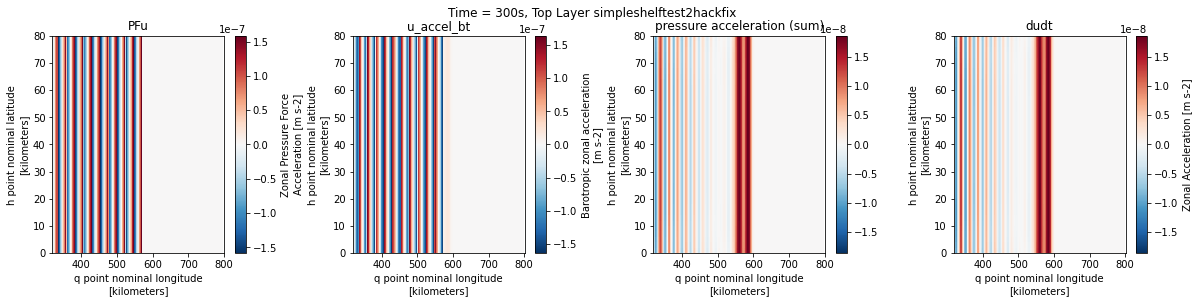

In [174]:
label = 'simpleshelftest2hackfix'
mom = open_mom(label)
prog, ocean_static = open_files(label)
tt = 0
zz = 0
fig,axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20,4))
mom.PFu.isel(Time = tt, zl = zz).plot(ax = axes[0])
axes[0].set_title('PFu')

mom.u_accel_bt.isel(Time = tt).plot(ax = axes[1])## no z dependence
axes[1].set_title('u_accel_bt')

mom.dudt.isel(Time = tt, zl = zz).plot(ax = axes[3])
axes[3].set_title('dudt')

RHS =  mom.PFu.isel(Time = tt, zl = zz) +\
      mom.u_accel_bt.isel(Time = tt) 
RHS.plot(ax = axes[2])
axes[2].set_title('pressure acceleration (sum)')


fig.subplots_adjust(wspace = 0.4, hspace = 0.4)
fig.suptitle('Time = 300s, Top Layer ' + label)

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_20734/475457207.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)


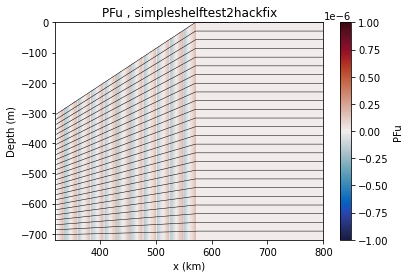

In [69]:
label = 'simpleshelftest2hackfix'
mom = open_mom(label)
folder = label

fig,axes = plt.subplots()
time = 0 ## 5 days
x = 0
ymax = 720
#plot temp
plot(axes,x,time,0,mom.PFu,"PFu",-1e-6,1e-6,cm.cm.balance,ymax)

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_20734/475457207.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)


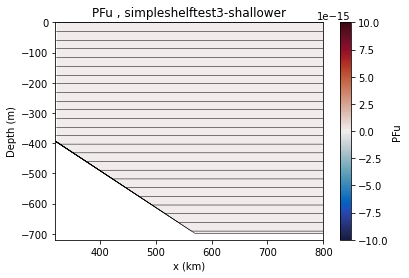

In [70]:
label = 'simpleshelftest3-shallower'
mom = open_mom(label)
folder = label

fig,axes = plt.subplots()
time = 0 ## 5 days
x = 0
ymax = 720
#plot temp
plot(axes,x,time,0,mom.PFu,"PFu",-1e-14,1e-14,cm.cm.balance,ymax)


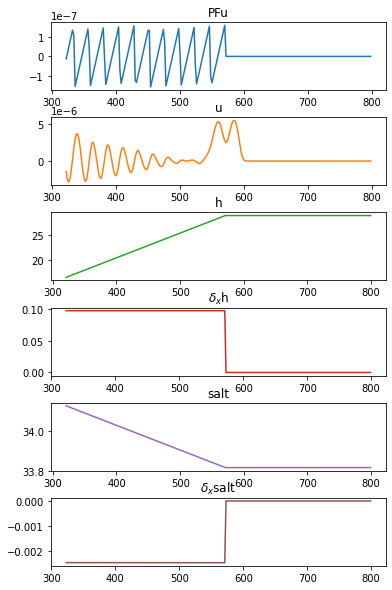

In [75]:
label = 'simpleshelftest2hackfix'
mom = open_mom(label)
prog, ocean_static = open_files(label)
fig, axes = plt.subplots(nrows = 6, figsize = (6,10))
axes[0].plot(mom.xq,mom.PFu.isel(Time = 0, zl = 0, yh = 0))
axes[0].set_title('PFu')
axes[1].plot(prog.xq,prog.u.isel(Time = 0, zl = 0, yh = 0),color = 'C1')
axes[1].set_title('u')
axes[2].plot(prog.xh,prog.h.isel(Time = 0, zl = 0, yh = 0),color = 'C2')
axes[2].set_title('h')
axes[3].plot(prog.xh[1:],prog.h.isel(Time = 0, zl = 0, yh = 0).diff('xh'),color = 'C3')
axes[3].set_title('$\delta_x$h')
axes[4].plot(prog.xh,prog.salt.isel(Time = 0, zl = 0, yh = 0),color = 'C4')
axes[4].set_title('salt')
axes[5].plot(prog.xh[1:],prog.salt.isel(Time = 0, zl = 0, yh = 0).diff('xh'),color = 'C5')
axes[5].set_title('$\delta_x$salt')

fig.subplots_adjust(hspace = 0.4)

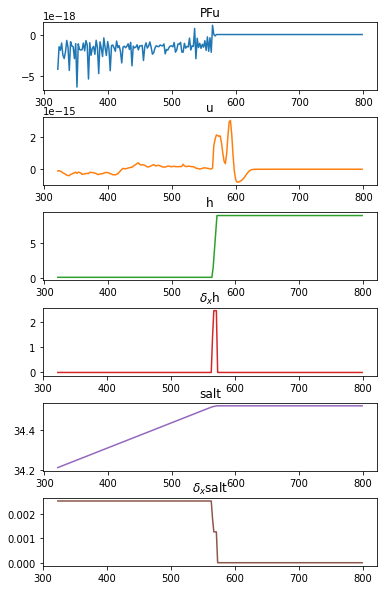

In [77]:
label = 'simpleshelftest3-shallower'
mom = open_mom(label)
prog, ocean_static = open_files(label)
fig, axes = plt.subplots(nrows = 6, figsize = (6,10))
axes[0].plot(mom.xq,mom.PFu.isel(Time = 0, zl = -1, yh = 0))
axes[0].set_title('PFu')
axes[1].plot(prog.xq,prog.u.isel(Time = 0, zl = -1, yh = 0),color = 'C1')
axes[1].set_title('u')
axes[2].plot(prog.xh,prog.h.isel(Time = 0, zl = -1, yh = 0),color = 'C2')
axes[2].set_title('h')
axes[3].plot(prog.xh[1:],prog.h.isel(Time = 0, zl = -1, yh = 0).diff('xh'),color = 'C3')
axes[3].set_title('$\delta_x$h')
axes[4].plot(prog.xh,prog.salt.isel(Time = 0, zl = -1, yh = 0),color = 'C4')
axes[4].set_title('salt')
axes[5].plot(prog.xh[1:],prog.salt.isel(Time = 0, zl = -1, yh = 0).diff('xh'),color = 'C5')
axes[5].set_title('$\delta_x$salt')

fig.subplots_adjust(hspace = 0.4)

## Maybe difference is that the sigma_shelf_zstar coordinates follow ice shelf but the zstar ones hit the topo - compare zstar to zstar?

time = 0001-01-01 00:05:00


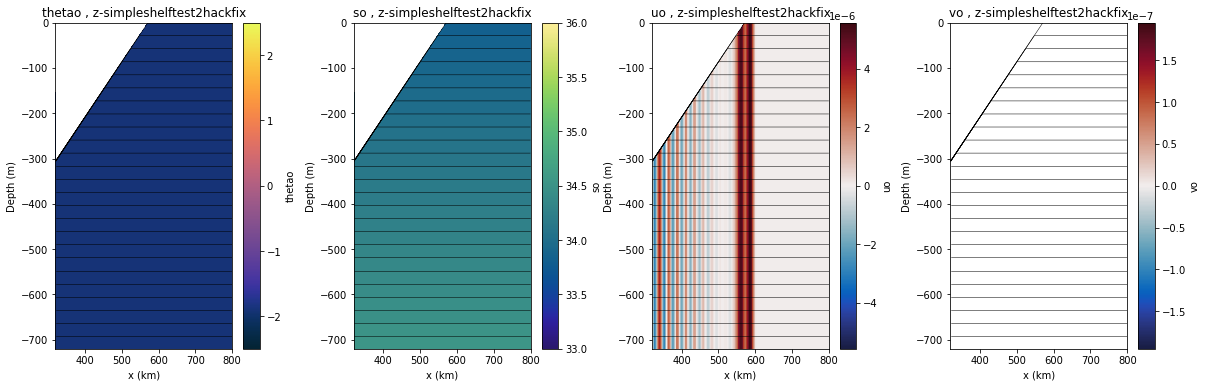

In [67]:
label = 'z-simpleshelftest2hackfix'
folder = label
prog, ocean_static = open_files(label)
IC = open_IC(label)
fig,axes = plt.subplots(figsize = (20,6), nrows = 1, ncols = 4)
time = 0 ## 5 days
x = 0
ymax = 720
#plot temp
plot(axes[0],x,time,0,prog.temp,"thetao",-2.5,2.5,cm.cm.thermal,ymax)
# plot salinity
plot(axes[1],x,time,0,prog.salt,"so",33,36,cm.cm.haline,ymax)
# plot u
scale = np.abs(prog.isel(Time = time).u).max().values
if scale < 1e-12: ## in case of very small number
    scale = 1e-12
scale = scale#/10
plot(axes[2],x,time,0,prog.u,"uo",-scale,scale,cm.cm.balance,ymax)
# plot v
scale = np.abs(prog.isel(Time = time).v).max().values
if scale < 1e-12: ## in case of very small number
    scale = 1e-12
scale = scale#/10
plot(axes[3],x,time,0,prog.v,"vo",-scale,scale,cm.cm.balance,ymax)

plt.subplots_adjust(wspace = 0.35, hspace = 0.3)

print('time = '+str(prog.isel(Time = time).Time.values))

Text(0.5, 0.98, 'Time = 300s, Top Layer z-simpleshelftest2hackfix')

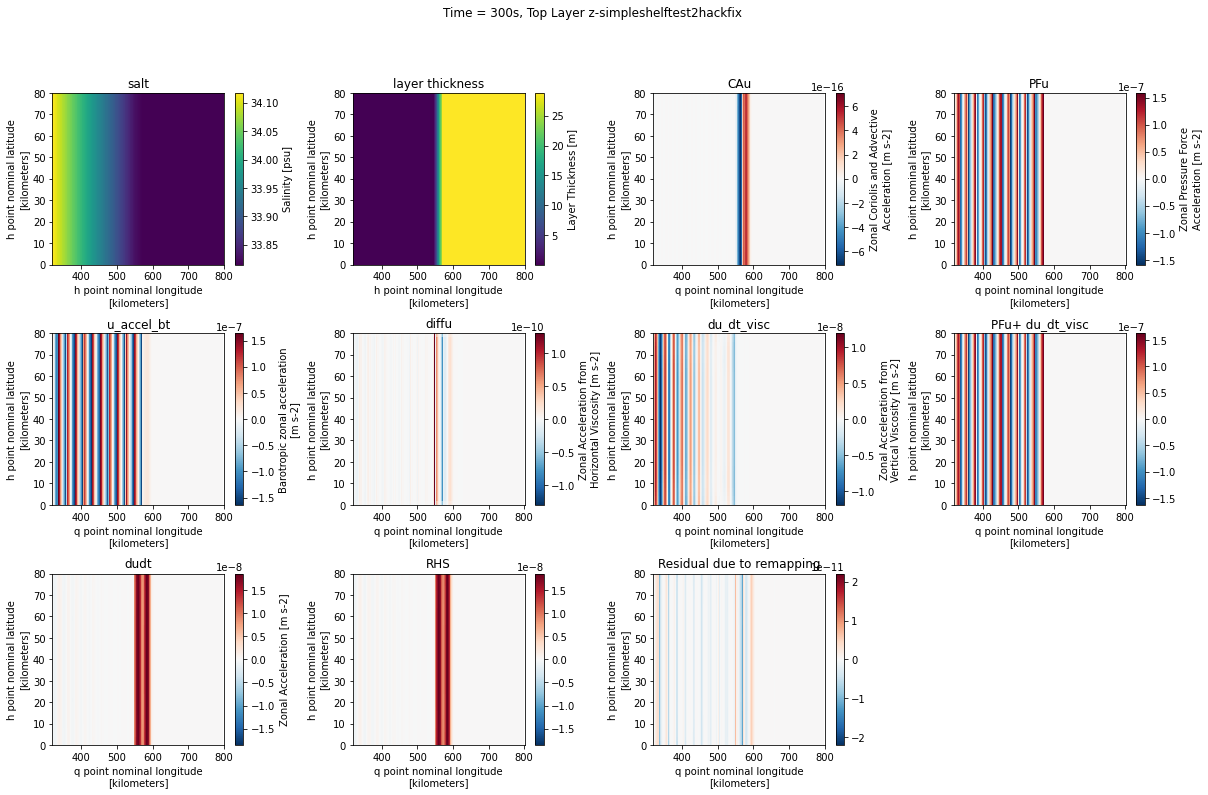

In [68]:
label = 'z-simpleshelftest2hackfix'
mom = open_mom(label)
prog, ocean_static = open_files(label)
tt = 0
zz = 0
fig,axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20,12))
prog.salt.isel(Time = tt, zl = zz).plot(ax = axes[0,0])
axes[0,0].set_title('salt')

prog.h.isel(Time = tt, zl = zz).plot(ax = axes[0,1])
axes[0,1].set_title('layer thickness')

mom.CAu.isel(Time = tt, zl = zz).plot(ax = axes[0,2])
axes[0,2].set_title('CAu')

mom.PFu.isel(Time = tt, zl = zz).plot(ax = axes[0,3])
axes[0,3].set_title('PFu')

mom.u_accel_bt.isel(Time = tt).plot(ax = axes[1,0])## no z dependence
axes[1,0].set_title('u_accel_bt')

mom.diffu.isel(Time = tt, zl = zz).plot(ax = axes[1,1]) 
axes[1,1].set_title('diffu')

mom.du_dt_visc.isel(Time = tt, zl = zz).plot(ax = axes[1,2])
axes[1,2].set_title('du_dt_visc')

(mom.PFu+mom.du_dt_visc).isel(Time = tt, zl = zz).plot(ax = axes[1,3])
axes[1,3].set_title('PFu+ du_dt_visc')


mom.dudt.isel(Time = tt, zl = zz).plot(ax = axes[2,0])
axes[2,0].set_title('dudt')

RHS = mom.CAu.isel(Time = tt, zl = zz) + mom.PFu.isel(Time = tt, zl = zz) +\
      mom.u_accel_bt.isel(Time = tt) + mom.diffu.isel(Time = tt, zl = zz) + \
      mom.du_dt_visc.isel(Time = tt, zl = zz)
RHS.plot(ax = axes[2,1])
axes[2,1].set_title('RHS')

(RHS-mom.dudt.isel(Time = tt, zl = zz)).plot(ax = axes[2,2])
axes[2,2].set_title('Residual due to remapping')

axes[2,3].axis('off')


fig.subplots_adjust(wspace = 0.4, hspace = 0.4)
fig.suptitle('Time = 300s, Top Layer ' + label)

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_20734/475457207.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)


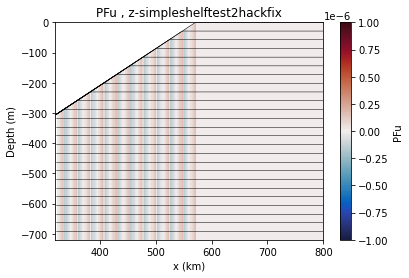

In [71]:
label = 'z-simpleshelftest2hackfix'
mom = open_mom(label)
folder = label

fig,axes = plt.subplots()
time = 0 ## 5 days
x = 0
ymax = 720
#plot temp
plot(axes,x,time,0,mom.PFu,"PFu",-1e-6,1e-6,cm.cm.balance,ymax)

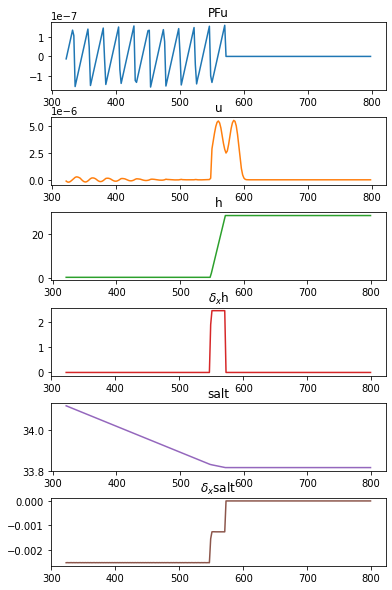

In [74]:
label = 'z-simpleshelftest2hackfix'
mom = open_mom(label)
prog, ocean_static = open_files(label)
fig, axes = plt.subplots(nrows = 6, figsize = (6,10))
axes[0].plot(mom.xq,mom.PFu.isel(Time = 0, zl = 0, yh = 0))
axes[0].set_title('PFu')
axes[1].plot(prog.xq,prog.u.isel(Time = 0, zl = 0, yh = 0),color = 'C1')
axes[1].set_title('u')
axes[2].plot(prog.xh,prog.h.isel(Time = 0, zl = 0, yh = 0),color = 'C2')
axes[2].set_title('h')
axes[3].plot(prog.xh[1:],prog.h.isel(Time = 0, zl = 0, yh = 0).diff('xh'),color = 'C3')
axes[3].set_title('$\delta_x$h')
axes[4].plot(prog.xh,prog.salt.isel(Time = 0, zl = 0, yh = 0),color = 'C4')
axes[4].set_title('salt')
axes[5].plot(prog.xh[1:],prog.salt.isel(Time = 0, zl = 0, yh = 0).diff('xh'),color = 'C5')
axes[5].set_title('$\delta_x$salt')

fig.subplots_adjust(hspace = 0.4)

why is the change region thicker for ice shelf?

why the periodic PFu/u_accel_bt/other terms?

does ice shelf bump up and down?

In [95]:
eta_IC

<xarray.Dataset>
Dimensions:          (xh: 240, latq: 41, lonq: 241, Layer: 25)
Coordinates:
    lath             float64 41.0
  * xh               (xh) float64 321.0 323.0 325.0 327.0 ... 795.0 797.0 799.0
  * latq             (latq) float64 0.0 2.0 4.0 6.0 8.0 ... 74.0 76.0 78.0 80.0
  * lonq             (lonq) float64 320.0 322.0 324.0 ... 796.0 798.0 800.0
  * Layer            (Layer) float64 14.4 43.2 72.0 100.8 ... 648.0 676.8 705.6
    Interface        float64 0.0
    Time             timedelta64[ns] 00:00:00
Data variables: (12/19)
    Temp             (Layer, xh) float64 ...
    Salt             (Layer, xh) float64 ...
    h                (Layer, xh) float64 ...
    u                (Layer, lonq) float64 ...
    v                (Layer, latq, xh) float64 ...
    ave_ssh          (xh) float64 ...
    ...               ...
    diffu            (Layer, lonq) float64 ...
    diffv            (Layer, latq, xh) float64 ...
    ubtav            (lonq) float64 ...
    vbtav            (latq, xh) float64 ...
    DTBT             timedelta64[ns] ...
    eta              (xh) float64 ...
Attributes:
    filename:  ./MOM_IC.nc

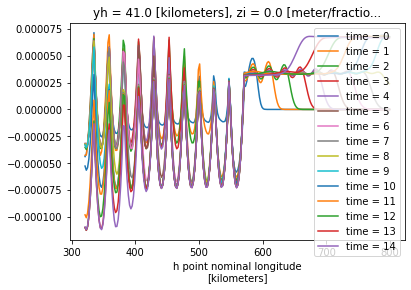

In [122]:
label = 'simpleshelftest2hackfix'
mom = open_mom(label)
prog, ocean_static = open_files(label)
IC = open_IC(label)
eta_IC = IC.eta.isel(Time = 0, Interface = 0,lath = 20).rename({'lonh':'xh'})
for time in np.arange(15):
    (prog.e.isel(zi = 0,yh = 20,Time = time)-eta_IC).plot(label = 'time = '+str(time))
plt.legend()

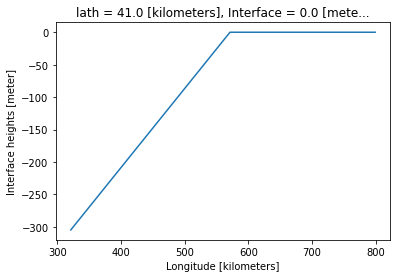

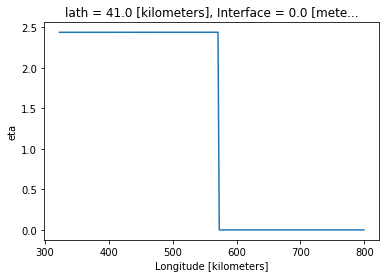

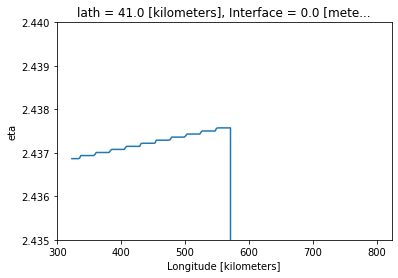

(-1e-05, 1e-05)

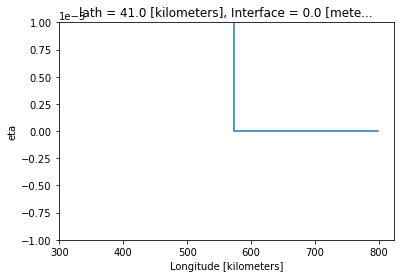

In [123]:
eta_IC.plot()
plt.show()
eta_IC.diff('xh').plot()
plt.show()
eta_IC.diff('xh').plot()
plt.ylim(2.435,2.44)
plt.show()
eta_IC.diff('xh').plot()
plt.ylim(-0.00001,0.00001)

(2.437, 2.438)

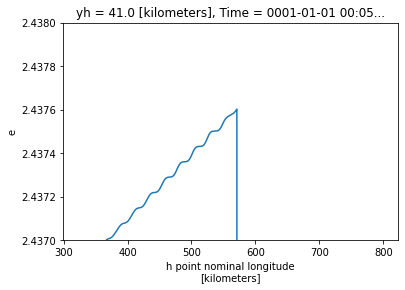

In [124]:
prog.e.isel(zi = 0,yh = 20,Time = 0).diff('xh').plot()
plt.ylim(2.437,2.438)

(0.0974, 0.0976)

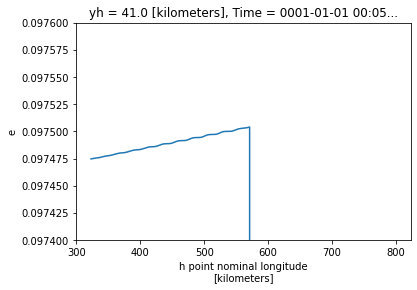

In [156]:
prog.e.isel(zi = -2,yh = 20,Time = 0).diff('xh').plot()
plt.ylim(0.0974,0.0976)

z and sigmashelfzstar exactly the same

(350.0, 400.0)

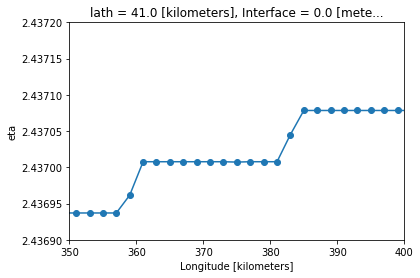

In [129]:
eta_IC.diff('xh').plot(marker = 'o')
plt.ylim(2.4369,2.4372)
plt.xlim(350,400)


(-2.8000001, -2.7999999)

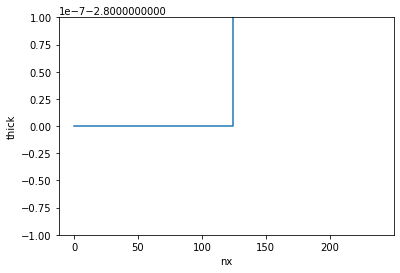

In [140]:
ice_shelf_file = xr.open_dataset('simpleshelftest2hackfix/INPUT/ice_shelf.nc')
ice_shelf_file.thick.diff('nx').isel(ny = 20).plot()
plt.ylim(-2.8000001,-2.7999999)

Input looks ok. topo is flat and therefore ok.

In [142]:
#topo?

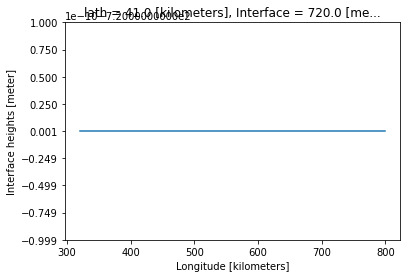

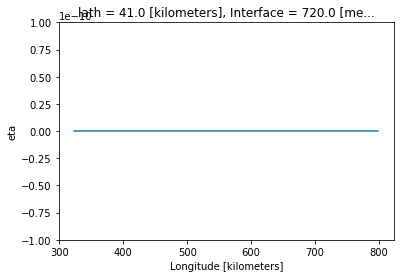

In [147]:
IC = open_IC(label)
eta_bot_IC = IC.eta.isel(Time = 0, Interface = -1,lath = 20).rename({'lonh':'xh'})
eta_bot_IC.plot()
plt.ylim(-720-1e-10,-720+1e-10)
plt.show()
eta_bot_IC.diff('xh').plot()
plt.ylim(-1e-10,1e-10)
plt.show()


(0.0974, 0.0976)

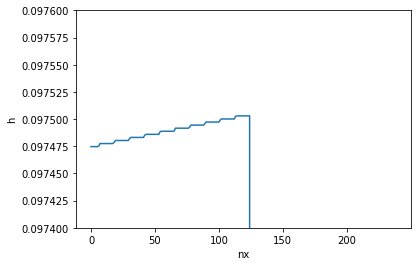

In [162]:
h = xr.open_dataset('simpleshelftest2hackfix/INPUT/thickness_simpleshelf2.nc').h
h.isel(nz = 0, ny = 20).diff('nx').plot()
plt.ylim(0.0974,0.0976)

(0.097475, 0.09751)

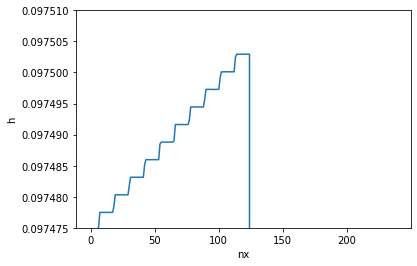

In [168]:
h = xr.open_dataset('simpleshelftest2hackfix/INPUT/thickness_simpleshelf2.nc').h
h.isel(nz = 0, ny = 20).diff('nx').plot()
plt.ylim(0.097475,0.09751)

(0.0974915, 0.097495)

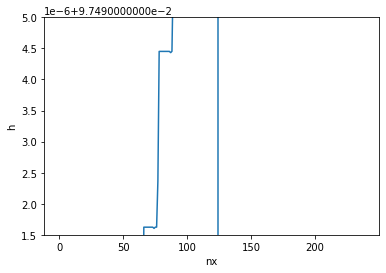

In [172]:
h = xr.open_dataset('simpleshelftest2hackfix/INPUT/thickness_simpleshelf2.nc').h
h.isel(nz = 0, ny = 20).diff('nx').plot()
plt.ylim(0.0974915,0.097495)

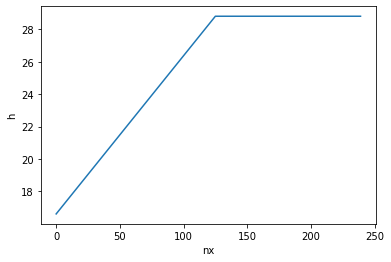

In [164]:
h.isel(nz = 0, ny = 20).plot()


In [169]:
h.isel(nz = 0, ny = 20).values#plot()


array([16.61383035, 16.711305  , 16.80877965, 16.9062543 , 17.00372896,
       17.10120361, 17.19867826, 17.29615338, 17.39363086, 17.49110834,
       17.58858583, 17.68606331, 17.78354079, 17.88101827, 17.97849575,
       18.07597323, 18.17345071, 18.27092819, 18.36840567, 18.46588413,
       18.56336444, 18.66084475, 18.75832506, 18.85580537, 18.95328568,
       19.05076598, 19.14824629, 19.24572658, 19.34320689, 19.4406872 ,
       19.53816751, 19.63564932, 19.73313245, 19.83061559, 19.92809873,
       20.02558186, 20.123065  , 20.22054814, 20.31803128, 20.41551441,
       20.51299755, 20.61048069, 20.70796382, 20.80544898, 20.90293494,
       21.00042091, 21.09790687, 21.19539284, 21.2928788 , 21.39036477,
       21.48785073, 21.5853367 , 21.68282266, 21.78030863, 21.87779459,
       21.97528307, 22.07277187, 22.17026066, 22.26774945, 22.36523825,
       22.46272704, 22.56021584, 22.65770463, 22.75519343, 22.85268222,
       22.95017101, 23.04766003, 23.14515165, 23.24264328, 23.34

order 10m, difference between each is 2e-6, so h needs at least 8 sf